In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [136]:
df = pd.read_csv('Dataset.csv')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179096 entries, 0 to 179095
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Age                   179096 non-null  object
 1   Sex                   179096 non-null  object
 2   Race                  179096 non-null  object
 3   Employment Status     179096 non-null  object
 4   Education Status      179096 non-null  object
 5   Alcohol               179096 non-null  object
 6   Drugs                 179096 non-null  object
 7   High Blood Pressure   179096 non-null  object
 8   Obesity               179096 non-null  object
 9   Diabetes              179096 non-null  object
 10  Smokes                179096 non-null  object
 11  Other Mental Illness  179096 non-null  object
 12  Insurance             179096 non-null  object
 13  Financial Assistance  179096 non-null  object
 14  Mental Illness        179096 non-null  object
dtypes: object(15)
mem

In [153]:
test_df = df.copy()

In [157]:
df.replace({'YES':1 ,'NO':0}, inplace=True)

In [ ]:
df.replace({'FEMALE': 0, 'MALE': 1}, inplace=True)

In [172]:
df.replace({'CHILD': 0, 'ADULT': 1}, inplace=True)

In [175]:
df_one = pd.get_dummies(df["Education Status"])

In [179]:
new_df = pd.concat((df, df_one), axis=1)
new_df = new_df.drop(["Education Status","Unknown"], axis=1)
new_df

,Age,Sex,Race,Employment Status,Alcohol,Drugs,High Blood Pressure,Obesity,Diabetes,Smokes,Other Mental Illness,Insurance,Financial Assistance,Mental Illness,College,High School
0,1,1,0,0,0,0,1,1,1,1,1,0,0,1,0,1
1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0
2,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,0
3,1,0,0,0,1,1,1,1,1,1,1,0,0,1,0,1
4,1,1,0,0,1,1,0,1,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179091,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1
179092,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,0
179093,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0
179094,1,0,1,0,1,0,1,1,1,0,1,0,0,1,1,0


In [192]:
new_df['Sex'] = new_df['Sex'].apply(lambda x: 1 if x=='UNKNOWN' else x)

In [194]:
def show_unique(df):
    for col in df:
        print(f'{col} unique: {df[col].unique()}')

In [193]:
show_unique(new_df)

Age unique: [1 0]
Sex unique: [1 0]
Race unique: [0 1]
Employment Status unique: [0 1]
Alcohol unique: [0 1]
Drugs unique: [0 1]
High Blood Pressure unique: [1 0]
Obesity unique: [1 0]
Diabetes unique: [1 0]
Smokes unique: [1 0]
Other Mental Illness unique: [1 0]
Insurance unique: [0 1]
Financial Assistance unique: [0 1]
Mental Illness unique: [1 0]
College unique: [0 1]
High School unique: [1 0]


In [197]:
new_df['Mental Illness'].value_counts()

1    166407
0     12689
Name: Mental Illness, dtype: int64

In [198]:
X = new_df.drop('Mental Illness',axis=1)
y = new_df['Mental Illness']
X = np.asarray(X).astype(np.float32)

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y)

In [201]:
from tensorflow import keras
from sklearn.metrics import classification_report
model = keras.Sequential([
    keras.layers.Dense(40, input_shape=(15,), activation='relu'),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
3918/3918 [==============================] - 6s 1ms/step - loss: 0.2361 - accuracy: 0.9146
Epoch 2/10
3918/3918 [==============================] - 5s 1ms/step - loss: 0.1962 - accuracy: 0.9328
Epoch 3/10
3918/3918 [==============================] - 5s 1ms/step - loss: 0.1955 - accuracy: 0.9325
Epoch 4/10
3918/3918 [==============================] - 5s 1ms/step - loss: 0.1969 - accuracy: 0.9330
Epoch 5/10
3918/3918 [==============================] - 5s 1ms/step - loss: 0.1924 - accuracy: 0.9333
Epoch 6/10
3918/3918 [==============================] - 5s 1ms/step - loss: 0.1918 - accuracy: 0.9337
Epoch 7/10
3918/3918 [==============================] - 5s 1ms/step - loss: 0.1951 - accuracy: 0.9331
Epoch 8/10
3918/3918 [==============================] - 5s 1ms/step - loss: 0.1938 - accuracy: 0.9327
Epoch 9/10
3918/3918 [==============================] - 5s 1ms/step - loss: 0.1908 - accuracy: 0.9344
Epoch 10/10
3918/3918 [==============================] - 5s 1ms/step - loss: 0.195

In [202]:
model.evaluate(X_test,y_test)

1680/1680 [==============================] - 2s 959us/step - loss: 0.1942 - accuracy: 0.9322


[0.19419072568416595, 0.9321967363357544]

In [203]:
y_pred = model.predict(X_test)
y_pred

array([[0.98952264],
       [0.9842202 ],
       [0.76253104],
       ...,
       [0.98904616],
       [0.8456609 ],
       [0.7046169 ]], dtype=float32)

In [204]:
y_preds = []
for y in y_pred:
    if y>0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [205]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.66      0.09      0.16      3807
           1       0.93      1.00      0.96     49922

    accuracy                           0.93     53729
   macro avg       0.80      0.54      0.56     53729
weighted avg       0.92      0.93      0.91     53729



In [207]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[  335,  3472],
       [  171, 49751]], dtype=int32)>

Text(33.0, 0.5, 'true')

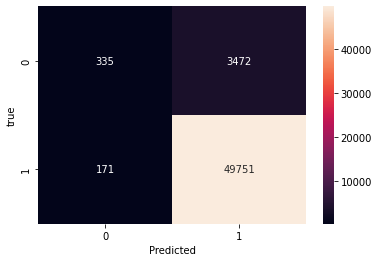

In [208]:

import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("true")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cc383444-b5ea-406a-bd5b-5ffb76e7fbf6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>